<a href="https://colab.research.google.com/github/Suriyabalu/ML-practise-/blob/main/Suriya_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset into a pandas dataframe
df =pd.DataFrame(pd.read_csv('https://docs.google.com/spreadsheets/d/1rK1CLqpsd6JfSBLk9nRE-f0NzDc9lEXgxZ-cKjxIN_s/export?format=csv')) 


# Drop the leads with STATUS other than ‘WON’ or ‘LOST’
df = df[df['status'].isin(['WON', 'LOST'])]


# Replace NaN values with a string
# df = df.fillna('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0')
df = df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan)
#Naming the first column
df.rename(columns={ df.columns[0]: "Sno" }, inplace = True)

df.head(2)


,Sno,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...


In [ ]:
df.shape

(46317, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46317 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sno             46317 non-null  int64 
 1   Agent_id        46317 non-null  object
 2   status          46317 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42623 non-null  object
 5   lease           43981 non-null  object
 6   movein          32707 non-null  object
 7   source          40366 non-null  object
 8   source_city     37486 non-null  object
 9   source_country  37695 non-null  object
 10  utm_source      46256 non-null  object
 11  utm_medium      43133 non-null  object
 12  des_city        43788 non-null  object
 13  des_country     43788 non-null  object
 14  room_type       22826 non-null  object
 15  lead_id         46317 non-null  object
dtypes: int64(1), object(15)
memory usage: 6.0+ MB


In [ ]:
df.describe()

,Sno
count,46317.000000
mean,23294.650819
std,13456.284959
min,0.000000
25%,11638.000000
50%,23295.000000
75%,34949.000000
max,46607.000000


In [ ]:
df.isnull().sum()

Sno                   0
Agent_id              0
status                0
lost_reason        3073
budget             3694
lease              2336
movein            13610
source             5951
source_city        8831
source_country     8622
utm_source           61
utm_medium         3184
des_city           2529
des_country        2529
room_type         23491
lead_id               0
dtype: int64

In [ ]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Sno                0.00
Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.98
lease              5.04
movein            29.38
source            12.85
source_city       19.07
source_country    18.62
utm_source         0.13
utm_medium         6.87
des_city           5.46
des_country        5.46
room_type         50.72
lead_id            0.00
dtype: float64

In [ ]:
df['room_type'].describe()

count       22826
unique          5
top       Ensuite
freq        12379
Name: room_type, dtype: object

<Axes: >

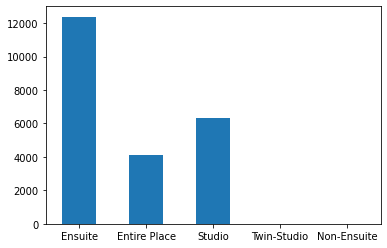

In [ ]:
df['room_type'].value_counts(sort=False).plot.bar(rot=0)

In [ ]:
df['room_type'].value_counts()

Ensuite         12379
Studio           6316
Entire Place     4128
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [ ]:
df['room_type'].isnull().count()


46317

In [ ]:
df['room_type'] = df['room_type'].replace(np.nan, 'Not mentioned')

In [ ]:
df['room_type'].value_counts()

Not mentioned    23491
Ensuite          12379
Studio            6316
Entire Place      4128
Non-Ensuite          2
Twin-Studio          1
Name: room_type, dtype: int64

<Axes: >

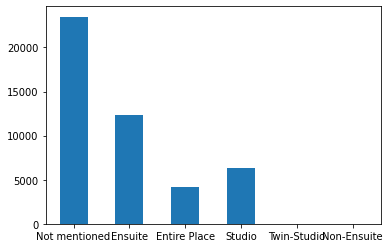

In [ ]:
df['room_type'].value_counts(sort=False).plot.bar(rot=0)

In [ ]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Sno                0.00
Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.98
lease              5.04
movein            29.38
source            12.85
source_city       19.07
source_country    18.62
utm_source         0.13
utm_medium         6.87
des_city           5.46
des_country        5.46
room_type          0.00
lead_id            0.00
dtype: float64

In [ ]:
df['movein'].describe()

count        32707
unique         469
top       10/09/22
freq          2450
Name: movein, dtype: object

In [ ]:
df['movein'].isnull().count()

46317

In [ ]:
df['movein'].value_counts()

10/09/22    2450
31/08/22    2187
01/09/22    2118
09/09/22    1563
17/09/22    1422
            ... 
26/04/23       1
10/06/23       1
05/01/24       1
06/09/06       1
06/06/23       1
Name: movein, Length: 469, dtype: int64

In [ ]:
df['movein'] = df['movein'].replace(np.nan, 'Not mentioned')

In [ ]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Sno                0.00
Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.98
lease              5.04
movein             0.00
source            12.85
source_city       19.07
source_country    18.62
utm_source         0.13
utm_medium         6.87
des_city           5.46
des_country        5.46
room_type          0.00
lead_id            0.00
dtype: float64

In [ ]:
df['source_country'].describe()

count                                                 37695
unique                                                  184
top       e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...
freq                                                  18667
Name: source_country, dtype: object

In [ ]:
won = (len(df[df['status'].isin(['WON'])])/len(df['status'].index))*100
won

6.634712956365914

Can you see this


In [ ]:
df = df.drop(['utm_source','utm_medium'],axis=1)
df

,Sno,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,Not mentioned,NaN,NaN,NaN,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Not mentioned,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,Not mentioned,NaN,NaN,NaN,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Not mentioned,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,Not mentioned,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Not mentioned,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,Not mentioned,NaN,NaN,NaN,NaN,NaN,Not mentioned,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,NaN,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,NaN,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...
46606,46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,LOST,Low availability,1108,294,30/08/22,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Not mentioned,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...


In [ ]:
df = df.drop(['movein'],axis=1)

In [ ]:
data_save1 =df

In [ ]:
df.shape

(46317, 13)

In [ ]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Sno                0.00
Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.98
lease              5.04
source            12.85
source_city       19.07
source_country    18.62
des_city           5.46
des_country        5.46
room_type          0.00
lead_id            0.00
dtype: float64

In [ ]:
df['source'].describe()

count                                                 40366
unique                                                  682
top       7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...
freq                                                  19092
Name: source, dtype: object

In [ ]:
df['source'].isnull().count()

46317

In [ ]:
df['budget'].describe()

count                   42623
unique                   1851
top       £60 - £120 Per week
freq                     9750
Name: budget, dtype: object

In [ ]:
df['budget'].isnull().count()

46317

In [ ]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Sno                0.00
Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.98
lease              5.04
source            12.85
source_city       19.07
source_country    18.62
des_city           5.46
des_country        5.46
room_type          0.00
lead_id            0.00
dtype: float64

In [ ]:
df[df['status']=='WON']['lost_reason'].replace(np.NaN,'won')

98       won
111      won
139      won
141      won
152      won
        ... 
46559    won
46566    won
46570    won
46586    won
46592    won
Name: lost_reason, Length: 3073, dtype: object

In [ ]:
df.loc[df['status']=='WON','lost_reason'] = df.loc[df['status']=='WON','lost_reason'].replace(np.NaN,'won')



In [ ]:
df.columns

Index(['Sno', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'source',
       'source_city', 'source_country', 'des_city', 'des_country', 'room_type',
       'lead_id'],
      dtype='object')

In [ ]:
df.nunique()

Sno               46317
Agent_id            120
status                2
lost_reason          31
budget             1851
lease               311
source              682
source_city        4315
source_country      184
des_city            219
des_country          14
room_type             6
lead_id           30491
dtype: int64

In [ ]:
chi2_selector= SelectKBest(chi2,k=5)
X_kbest=chi2_selector.fit_transform()

In [ ]:
#function to calculate chisqaure metrics
from scipy import stats
from sklearn.feature_selection import SelectKBest,SelectPercentile,chi2,mutual_info_classif
def chi_sq_test(A,B):
    contingTab=pd.crosstab(A,B)
    l=[]
    for i in list(list(contingTab.index)):
            l.append(contingTab.transpose()[i][0:2].values)
    contab=np.array(l)
    chi2,p,dof,expected=stats.chi2_contingency(contab)
    print(f'chi2 : {chi2}\np-value : {p}\ndof : {dof}')

A=df['Agent_id']


In [ ]:
chi_sq_test(df['source_city'],df['status'])

chi2 : 4029.4654830410423
p-value : 0.9991142239722209
dof : 4314


In [ ]:
df=df.drop(['source_city'],axis=1)

In [ ]:
l=list(df.columns)
for i in l:
  if i!='status' and i!='Sno':
    print(i)
    chi_sq_test(df[i],df['status'])

Agent_id
chi2 : 1246.019325988118
p-value : 4.958524714847613e-187
dof : 119
lost_reason
chi2 : 46316.99999999999
p-value : 0.0
dof : 30
budget
chi2 : 4391.283908812822
p-value : 2.569473460715929e-207
dof : 1850
lease
chi2 : 2107.580257400343
p-value : 2.676096983439987e-264
dof : 310
source
chi2 : 3560.2546660145827
p-value : 0.0
dof : 681
source_country
chi2 : 371.28303364360465
p-value : 6.718913547862913e-15
dof : 183
des_city
chi2 : 1805.4262888628596
p-value : 1.2280166367104508e-247
dof : 218
des_country
chi2 : 88.21747602719948
p-value : 3.060627715264895e-13
dof : 13
room_type
chi2 : 59.37316649922035
p-value : 1.6377154420105805e-11
dof : 5
lead_id
chi2 : 30666.066781592574
p-value : 0.23751433686922638
dof : 30490


In [ ]:
chi_sq_test(df['source'],df['status'])

chi2 : 3560.2546660145827
p-value : 0.0
dof : 681


In [ ]:
Y=df['status']
X=df.drop(['status','Sno'],axis=1)

In [ ]:
Y

0        LOST
1        LOST
2        LOST
3        LOST
4        LOST
         ... 
46603    LOST
46604    LOST
46605    LOST
46606    LOST
46607    LOST
Name: status, Length: 46317, dtype: object

In [ ]:
X

In [ ]:
df.isna().sum()

Sno                  0
Agent_id             0
status               0
lost_reason          0
budget            3694
lease             2336
source            5951
source_country    8622
des_city          2529
des_country       2529
room_type            0
lead_id              0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')
df['budget'] = si.fit_transform(df[['budget']])
df['lease'] = si.fit_transform(df[['lease']])
df['source'] = si.fit_transform(df[['source']])
df['source_country'] = si.fit_transform(df[['source_country']])
df['des_city'] = si.fit_transform(df[['des_city']])
df['des_country'] = si.fit_transform(df[['des_country']])

In [ ]:
df.isna().sum()

Sno               0
Agent_id          0
status            0
lost_reason       0
budget            0
lease             0
source            0
source_country    0
des_city          0
des_country       0
room_type         0
lead_id           0
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC,NuSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import RidgeClassifier,RidgeClassifierCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
df2=pd.get_dummies(X)

In [ ]:
y=df['status']
X=df.drop(['status','Sno','lead_id'],axis=1)

In [ ]:
y=y.replace("WON",1)
y=y.replace("LOST",0)
y.nunique()

2

In [ ]:
y.unique()

array([0, 1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
si = LabelEncoder()
X['budget'] = si.fit_transform(X[['budget']])
X['lease'] = si.fit_transform(X[['lease']])
X['room_type'] = si.fit_transform(X[['room_type']])



/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X

,Agent_id,lost_reason,budget,lease,source,source_country,des_city,des_country,room_type
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,Not responding,1834,266,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,3
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,Low budget,1834,266,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,3
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,Not responding,1752,266,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,0
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,Low budget,10,2,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,3
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,Junk lead,1834,266,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,3
...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,Low availability,1834,263,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8da82000ef9c4468ba47362a924b895e40662fed846942...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,4
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,Semester stay,1834,286,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8da82000ef9c4468ba47362a924b895e40662fed846942...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,4
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,Low availability,1810,266,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8da82000ef9c4468ba47362a924b895e40662fed846942...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,4
46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,Low availability,815,93,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,3


In [ ]:
X=pd.get_dummies(X)

In [ ]:
X.shape

(46317, 1253)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=65)

In [ ]:
stratified_split_cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=65)

In [ ]:
lr=LogisticRegression(solver='newton-cholesky',random_state=65)
lr.fit(X_train,Y_train)
lr_test_score=lr.score(X_test,Y_test)
lr_train_score=lr.score(X_train,Y_train)
acc_log = round(lr_test_score * 100, 2)
print(f'Train Accuracy Score: {round(lr_train_score*100,2)}\nTest Accuracy Score: {acc_log}\nF1_score: {round(100*f1_score(Y_test,lr.predict(X_test)),2)}')

Train Accuracy Score: 100.0
Test Accuracy Score: 100.0
F1_score: 100.0


In [ ]:
print(classification_report(Y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8649
           1       1.00      1.00      1.00       615

    accuracy                           1.00      9264
   macro avg       1.00      1.00      1.00      9264
weighted avg       1.00      1.00      1.00      9264



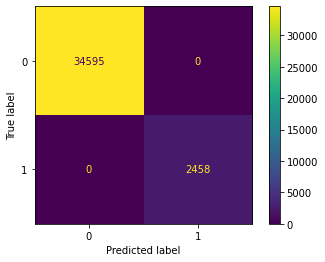

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr,X_train,Y_train)

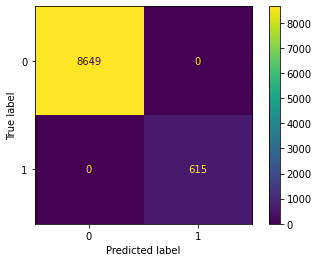

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr,X_test,Y_test)

In [ ]:
#Perceptron
percp=Perceptron(random_state=65)
percp.fit(X_train,Y_train)
percp_test_score=percp.score(X_test,Y_test)
percp_train_score=percp.score(X_train,Y_train)
acc_percp = round(percp_test_score * 100, 2)
print(f'Train Accuracy Score: {round(percp_train_score*100,2)}\nTest Accuracy Score: {acc_percp}\nF1_score: {round(100*f1_score(Y_test,percp.predict(X_test)),2)}')

Train Accuracy Score: 93.75
Test Accuracy Score: 93.78
F1_score: 12.99


In [ ]:
# Decision Tree Classifier
dct=DecisionTreeClassifier(random_state=65)
dct.fit(X_train,Y_train)
dct_test_score=dct.score(X_test,Y_test)
dct_train_score=dct.score(X_train,Y_train)
acc_dct = round(dct_test_score * 100, 2)
print(f'Train Accuracy Score: {round(dct_train_score*100,2)}\nTest Accuracy Score: {acc_dct}\nF1_score: {round(100*f1_score(Y_test,dct.predict(X_test)),2)}')

Train Accuracy Score: 100.0
Test Accuracy Score: 100.0
F1_score: 100.0


In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=10)# n=31 from HPT
knn.fit(X_train, Y_train)
knn_test_score=knn.score(X_test,Y_test)
knn_train_score=knn.score(X_train,Y_train)
acc_knn = round(knn_test_score * 100, 2)
f1_knn=round(100*f1_score(Y_test,knn.predict(X_test)),2)
print(f'Train Accuracy Score: {round(knn_train_score*100,2)}\nTest Accuracy Score: {acc_knn}\nF1_score: {f1_knn}')

Train Accuracy Score: 96.93
Test Accuracy Score: 96.49
F1_score: 65.61


In [ ]:
#Random Forest Classifier
raf=RandomForestClassifier(random_state=65)
raf.fit(X_train,Y_train)
raf_test_score=raf.score(X_test,Y_test)
raf_train_score=raf.score(X_train,Y_train)
acc_raf = round(raf_test_score * 100, 2)
print(f'Train  Accuracy Score: {round(raf_train_score*100,2)}\nTest Accuracy Score: {acc_raf}\nF1_score :{round(100*f1_score(Y_test,raf.predict(X_test)),2)}')

Train  Accuracy Score: 100.0
Test Accuracy Score: 100.0
F1_score :100.0
